In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mounting the drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Data path
path = "1673873388_rolling_stones_spotify.xlsx"

# Reading the path
df = pd.read_excel(path, index_col=0)
df.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10             3   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10             4   
4          Donâ€™t Stop - Live  Licked Live In NYC   2022-06-10             5   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.463   0.993          0.996000     0.932   -12.913       0.1100   
1         0.326   0.965          0.233000     0.961    -4.803       0.0759   
2         0.386   0.969          0.400000     0.956    -4.936       0.1150   
3         0.369   0.985          0.000107     0.895    -5.535       0.1930   
4         0.303   0.969          0.055900     0.966    -5.098       0.0930   

     tempo  valence  popularity  duration_ms  
0  118.001   0.0302          33        48640  
1  131.455   0.3180          34       253173  
2  130.066   0.3130          34       263160  
3  132.994   0.1470          32       305880  
4  130.533   0.2060          32       305106

## Data Exploration:

In [5]:
print("The dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

The dataset contains 1610 rows and 17 columns


In [6]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   id                1610 non-null   object        
 5   uri               1610 non-null   object        
 6   acousticness      1610 non-null   float64       
 7   danceability      1610 non-null   float64       
 8   energy            1610 non-null   float64       
 9   instrumentalness  1610 non-null   float64       
 10  liveness          1610 non-null   float64       
 11  loudness          1610 non-null   float64       
 12  speechiness       1610 non-null   float64       
 13  tempo             1610 non-null   float64       
 14  valence           1610 non-nu

In [7]:
# Statistical analysis of data
df.describe().T

count                           mean                  min  \
release_date        1610  1992-04-23 12:57:14.534161536  1964-04-16 00:00:00   
track_number      1610.0                       8.613665                  1.0   
acousticness      1610.0                       0.250475             0.000009   
danceability      1610.0                        0.46886                0.104   
energy            1610.0                       0.792352                0.141   
instrumentalness  1610.0                        0.16417                  0.0   
liveness          1610.0                        0.49173               0.0219   
loudness          1610.0                      -6.971615              -24.408   
speechiness       1610.0                       0.069512               0.0232   
tempo             1610.0                     126.082033               46.525   
valence           1610.0                       0.582165                  0.0   
popularity        1610.0                      20.788199                  0.0   
duration_ms       1610.0                  257736.488199              21000.0   

                                  25%                  50%  \
release_date      1970-09-04 00:00:00  1986-03-24 00:00:00   
track_number                      4.0                  7.0   
acousticness                  0.05835                0.183   
danceability                  0.36225                0.458   
energy                          0.674               0.8485   
instrumentalness             0.000219              0.01375   
liveness                        0.153               0.3795   
loudness                      -8.9825               -6.523   
speechiness                    0.0365               0.0512   
tempo                       107.39075             124.4045   
valence                       0.40425                0.583   
popularity                       13.0                 20.0   
duration_ms                  190613.0             243093.0   

                                  75%                  max           std  
release_date      2017-12-01 00:00:00  2022-06-10 00:00:00           NaN  
track_number                     11.0                 47.0       6.56022  
acousticness                  0.40375                0.994      0.227397  
danceability                    0.578                0.887      0.141775  
energy                          0.945                0.999      0.179886  
instrumentalness                0.179                0.996      0.276249  
liveness                      0.89375                0.998        0.3491  
loudness                     -4.60875               -1.014      2.994003  
speechiness                    0.0866                0.624      0.051631  
tempo                       142.35575              216.304     29.233483  
valence                         0.778                0.974      0.231253  
popularity                       27.0                 80.0     12.426859  
duration_ms                 295319.75             981866.0  108333.47492

In [8]:
# Checking for null values
pd.isnull(df).sum().sum()

0

In [9]:
# Checking for unique number of values for each column
df.nunique().to_frame(name = "Unique Values")

Unique Values
name                        954
album                        90
release_date                 57
track_number                 47
id                         1610
uri                        1610
acousticness                933
danceability                518
energy                      511
instrumentalness           1134
liveness                    757
loudness                   1329
speechiness                 655
tempo                      1424
valence                     701
popularity                   69
duration_ms                1320

In [10]:
# top 10 songs

top_10_songs = df.name.value_counts()[:10]
top_10_songs.to_frame(name = "Count")

Count
name                                       
Brown Sugar - Live                       16
Honky Tonk Women - Live                  16
Tumbling Dice - Live                     14
Sympathy For The Devil - Live            13
Start Me Up - Live                       12
Miss You - Live                          11
Jumpinâ€™ Jack Flash - Live              11
(I Can't Get No) Satisfaction - Live      9
Street Fighting Man - Live                9
Midnight Rambler - Live                   9

In [11]:
# top 10 albums

top_10_albums = df.album.value_counts()[:10]
top_10_albums.to_frame(name = "Count")

Count
album                                 
Voodoo Lounge Uncut (Live)          56
Honk (Deluxe)                       47
Live Licks                          46
Tattoo You (Super Deluxe)           46
Some Girls (Deluxe Version)         44
Goats Head Soup (Deluxe)            37
Flashpoint                          34
Sticky Fingers (Super Deluxe)       33
On Air (Deluxe)                     32
Live At The Checkerboard Lounge     32

In [12]:
# Extracting year from the release date
df['release_year'] = df['release_date'].dt.year

# Unique number of years
df.release_year.nunique()

35

In [13]:
# Top 10 year-wise content release
df.release_year.value_counts().to_frame(name = "Year-wise release")[:10]

Year-wise release
release_year                   
2016                        108
1965                        108
1967                        102
2019                         91
2017                         82
1972                         81
2021                         79
2018                         76
2020                         64
1966                         63

In [14]:
# Song duration in minutes
df["duration_min"] = df["duration_ms"]/60000
df["duration_min"].describe()

count    1610.000000
mean        4.295608
std         1.805558
min         0.350000
25%         3.176883
50%         4.051550
75%         4.921996
max        16.364433
Name: duration_min, dtype: float64

## EDA:

In [16]:
# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objs as go

In [17]:
temp = df.copy()

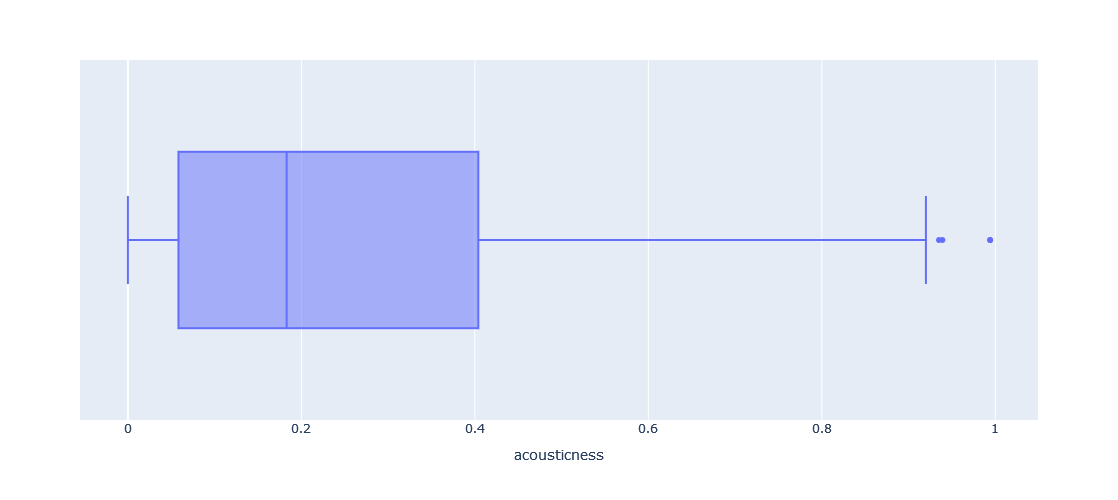

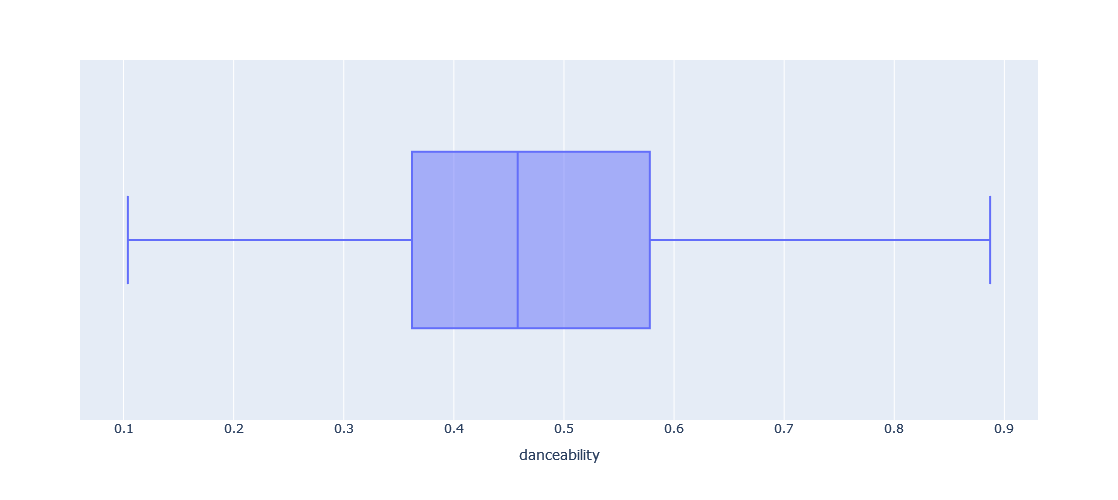

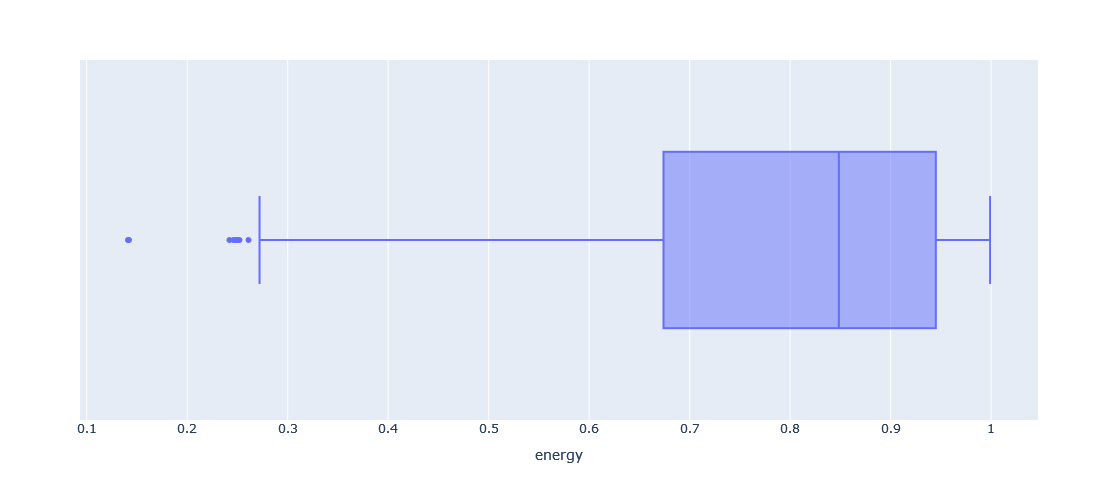

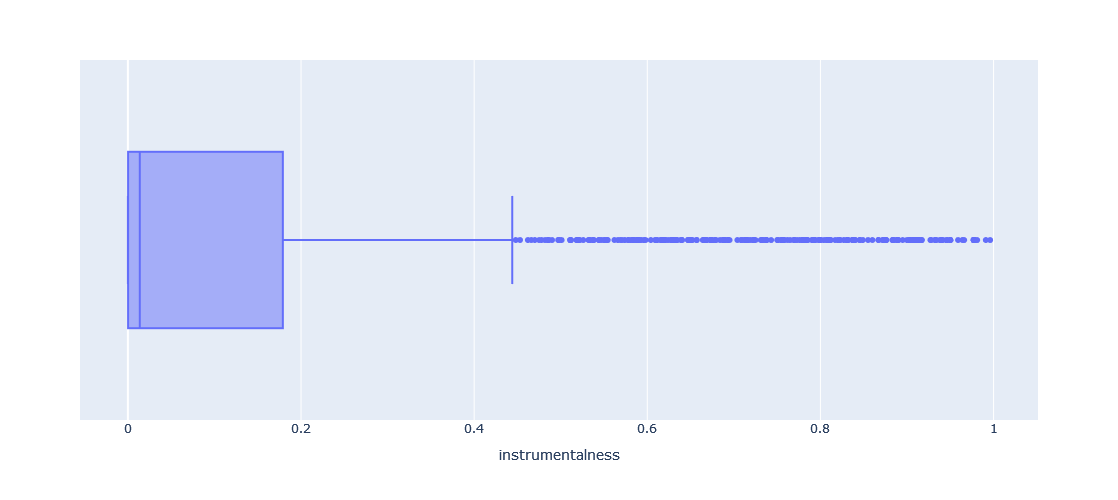

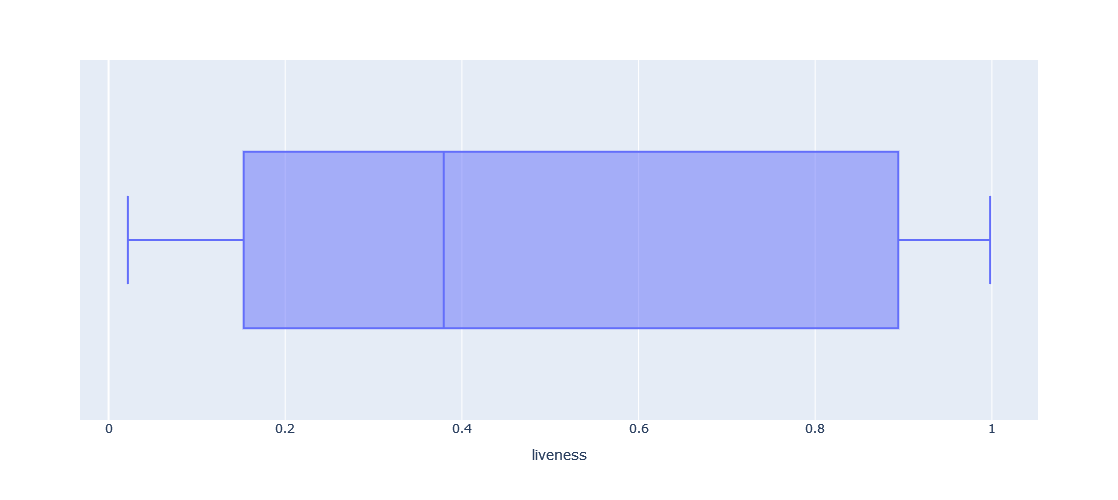

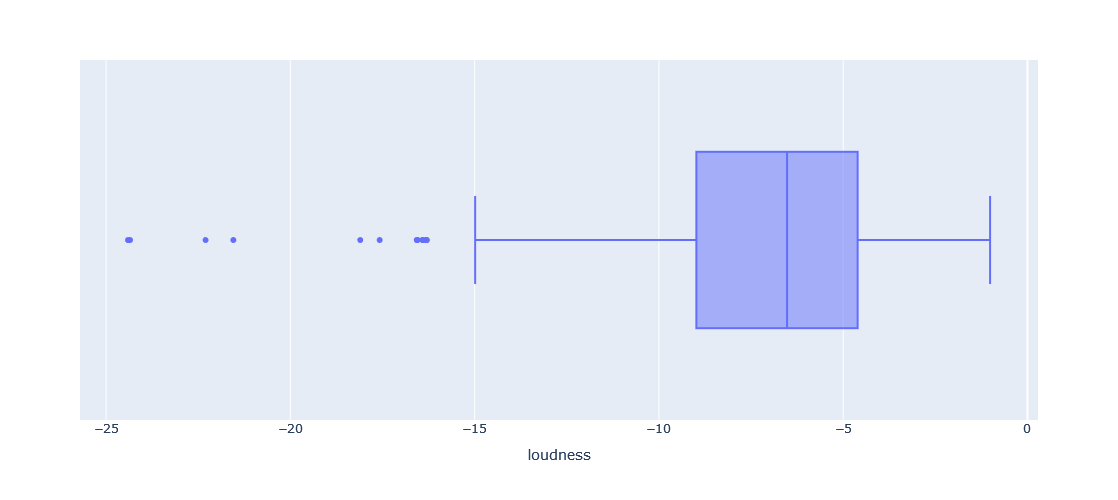

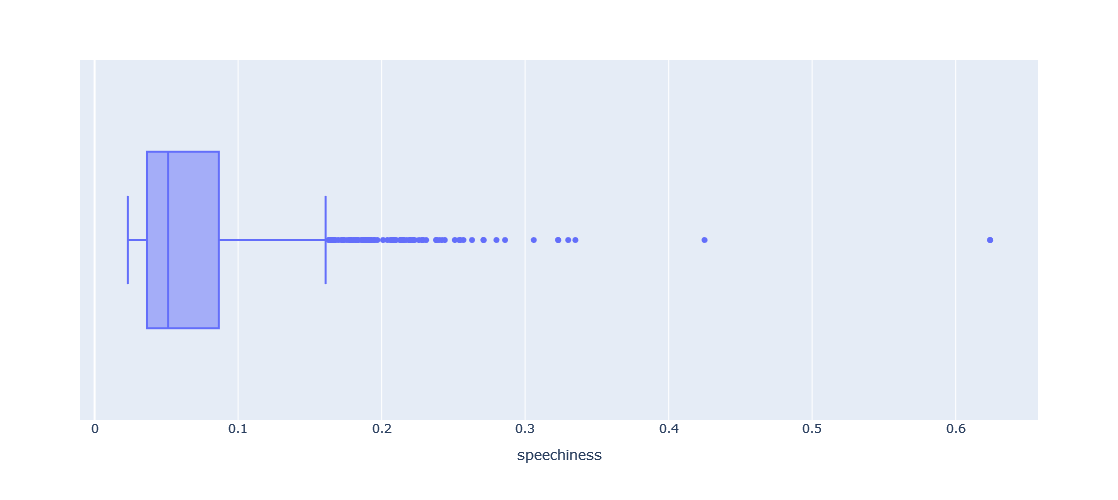

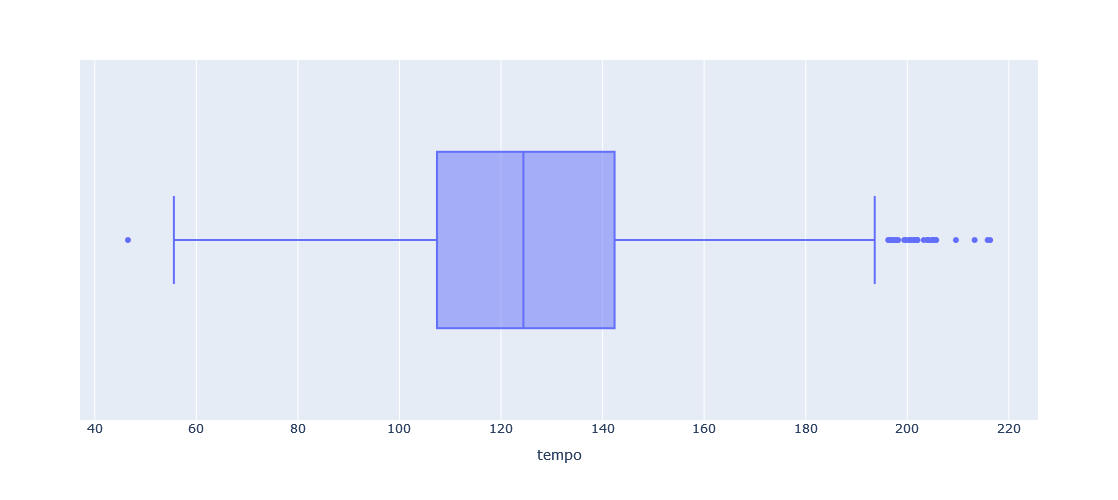

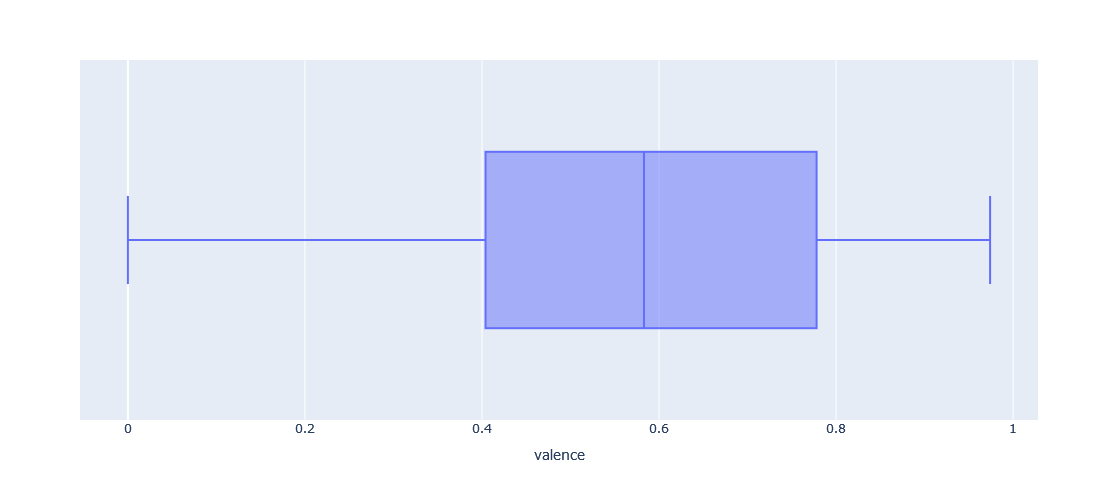

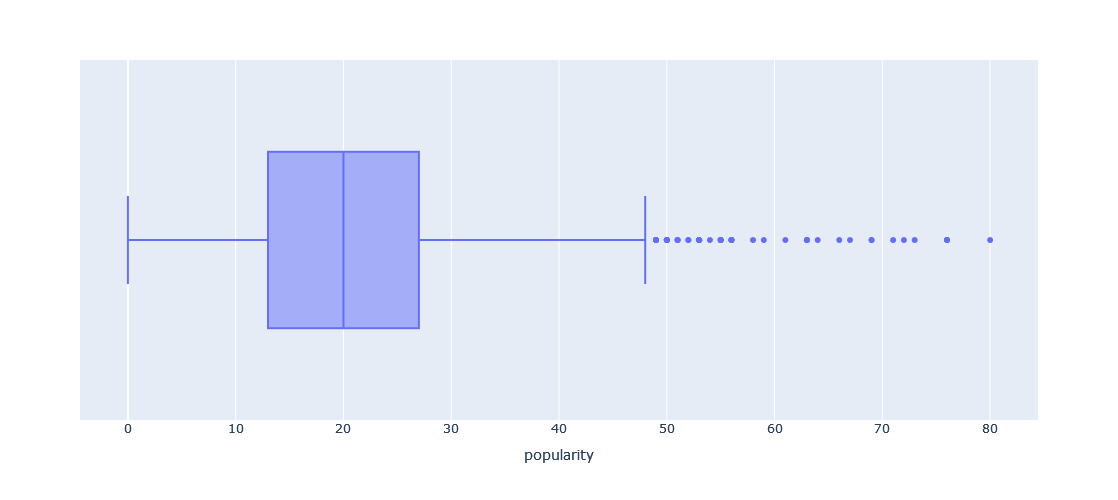

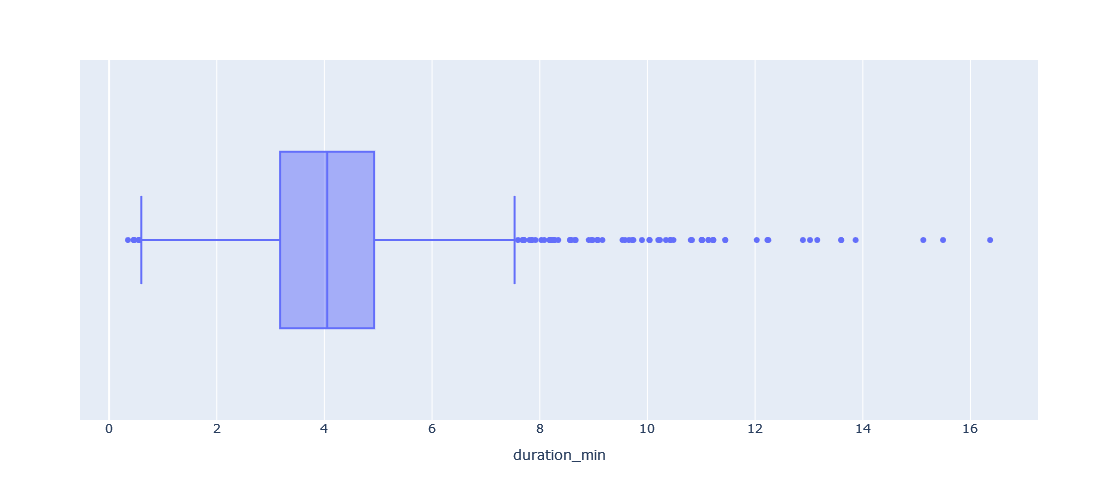

In [18]:
# Checking for outliers using box-plot
features = temp[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
            'speechiness', 'tempo', 'valence', 'popularity', 'duration_min']]

for i, col in enumerate(features.columns):
  fig = px.box(features, x = col)
  fig.update_layout(width = 1000, height = 500, bargap = 0.1)
  fig.show()

In [19]:
# Song duration in minutes
temp["duration_min"] = temp["duration_ms"]/60000

temp["duration_min"].describe()

count    1610.000000
mean        4.295608
std         1.805558
min         0.350000
25%         3.176883
50%         4.051550
75%         4.921996
max        16.364433
Name: duration_min, dtype: float64

In [20]:
def getyear(x):
    return x.year

temp["release_date"] = temp["release_date"].apply(getyear)

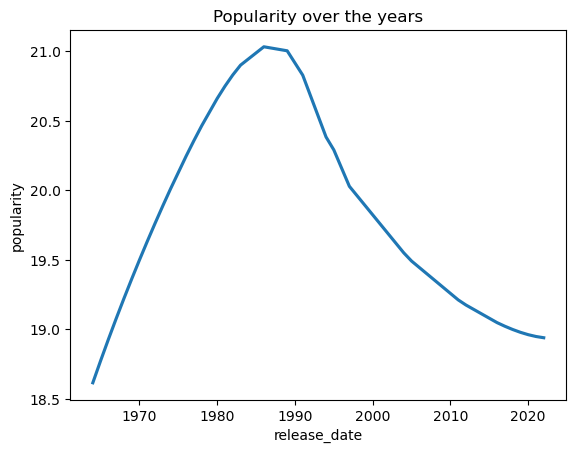

In [21]:
# Year-wise popularity analyzing
sns.regplot(x=temp["release_date"],y=temp["popularity"],lowess=True,scatter=False);
plt.title("Popularity over the years");

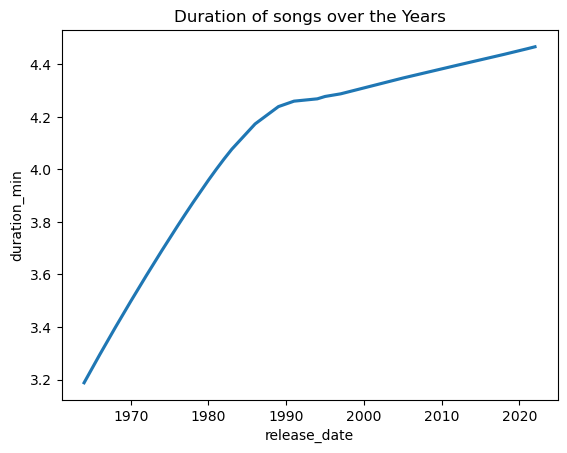

In [22]:
# Year-wise duration(min) analyzing
sns.regplot(x=temp["release_date"],y=temp["duration_min"],lowess=True,scatter=False);
plt.title("Duration of songs over the Years");

In [23]:
# Decade-wise released contents

def get_decade(year):
  first_year = int(year/10) * 10
  decade = str(first_year) + "s"
  return decade

temp['decade'] = temp['release_year'].apply(get_decade)
fig = px.histogram(temp.sort_values('decade'), x = 'decade', color = 'decade', text_auto=True, width = 800, height = 400)
fig.show()

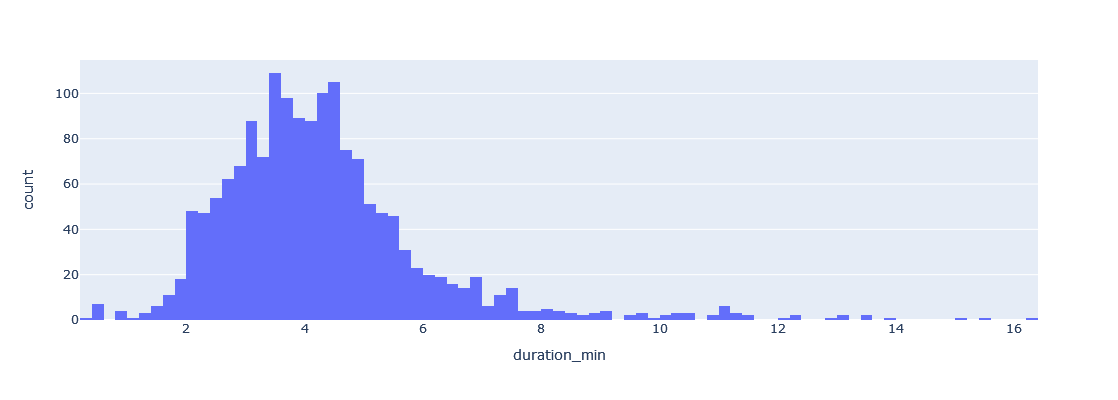

In [24]:
# Duration(min) analysis
fig = px.histogram(df.sort_values("duration_min"), x = "duration_min", width = 800, height = 400)
fig.show()

In [25]:
# Fuction for plotting bar graph

def plot_bar_graph(x, y, title, x_value):
    d = {x_value: x, 'Total Count': y}
    dataframe = pd.DataFrame(data=d)
    fig = px.bar(dataframe, x=x_value, y='Total Count', text_auto=True, width = 800, height = 400)
    fig.update_layout(
        title_text = title,
        titlefont = dict(size=20)
    )
    fig.show()

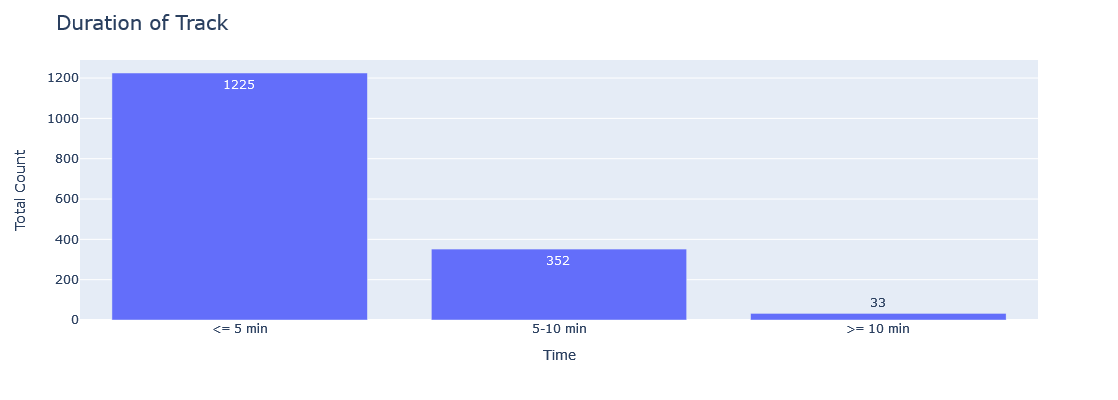

In [26]:
# To find out the number of songs in a particular duration
temp['category_duration'] = pd.DataFrame(pd.cut(temp.duration_min, bins=[0, 5.0, 10.0, np.inf], labels=['Less than 5 min' , '5 - 10 min', 'More than 10 min']))

p = temp['category_duration']

less_than_5, range_5_10, more_than_10 = p.value_counts()

x = ['<= 5 min', '5-10 min', '>= 10 min']
y = [less_than_5, range_5_10, more_than_10]

plot_bar_graph(x, y,'Duration of Track', 'Time')

In [27]:
# Check for maximum and minimum liveness of a song
print(temp['liveness'].max(), ",", temp['liveness'].min())

0.998 , 0.0219


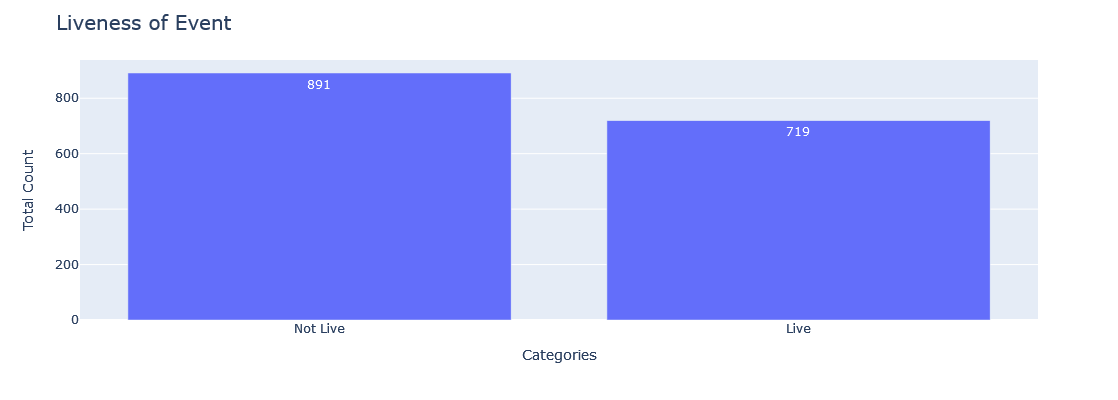

In [28]:
# To find out the number of songs for a particular mood
temp['liveness_check'] = pd.DataFrame(pd.cut(temp.liveness, [0, 0.5, 1], labels=['Not Live', 'Live']))

p = temp['liveness_check']

a, b = p.value_counts()

x = ['Not Live', 'Live']
y = [a, b]

plot_bar_graph(x,y, 'Liveness of Event', 'Categories')

In [29]:
# Check for maximum and minimum speechiness of a song
print(temp['speechiness'].max(), ",", temp['speechiness'].min())

0.624 , 0.0232


In [30]:
# To detect the presence of spoken words in a track
temp['Song_Content'] = pd.DataFrame(pd.cut(temp.speechiness, [0, 0.1, np.inf], labels=['Only Music/Non-Speech-Like tracks' , 'Both music and speech']))

p = temp['Song_Content']

only_music, both = p.value_counts()

x = ['Only Music', 'Both music and speech']
y = [only_music, both]

plot_bar_graph(x, y,'Song Content in a track', 'Song Content')

In [31]:
# Check for maximum and minimum valence of a song
print(temp['valence'].max(), ",", temp['valence'].min())

0.974 , 0.0


In [32]:
# To determine the musical positiveness conveyed by a track
temp['Mode_Of_Music'] = pd.DataFrame(pd.cut(temp.valence, [0, 0.20, 0.80, 1.0], labels=['More Detrimental' , 'Both Enthusiastic and Detrimental','More Enthusiastic']))

p = temp['Mode_Of_Music']

only_negative, both, only_positive = p.value_counts()

x = ['Detrimental', 'Mixed', 'Enthusiastic']
y = [only_negative, both, only_positive]

plot_bar_graph(x, y, 'Mode of Track', 'Mode of Music')

In [33]:
# Check for maximum and minimum danceability of a song
print(temp['danceability'].max(), temp['danceability'].min())

0.887 0.104


In [34]:
# To identify how many songs are suitable for dancing
temp['suitable_dance'] = pd.DataFrame(pd.cut(temp.danceability, [0, 0.50, 1.0], labels=['Less Danceable' , 'Danceable']))

p = temp['suitable_dance']

Less_Danceable, Danceable = p.value_counts()

x = ['Less Danceable', 'Danceable']
y = [Less_Danceable, Danceable]

plot_bar_graph(x, y,'Suitability of Dance in Music', 'Categories')

In [35]:
print(temp['popularity'].max(), ",", temp['popularity'].min())

80 , 0


In [36]:
# Popularity analysis
temp['track_popular'] = pd.DataFrame(pd.cut(temp.popularity, bins=[0, 20, 50, 80], labels=['Less Popular' , 'More Popular', 'Most Popular']))

p = temp['track_popular']

less, more, most = p.value_counts()

x = ['Less Popular', 'More Popular', 'Most Popular']
y = [less, more, most]

plot_bar_graph(x, y,'Number of songs according to popularity', 'Popularity of Song')

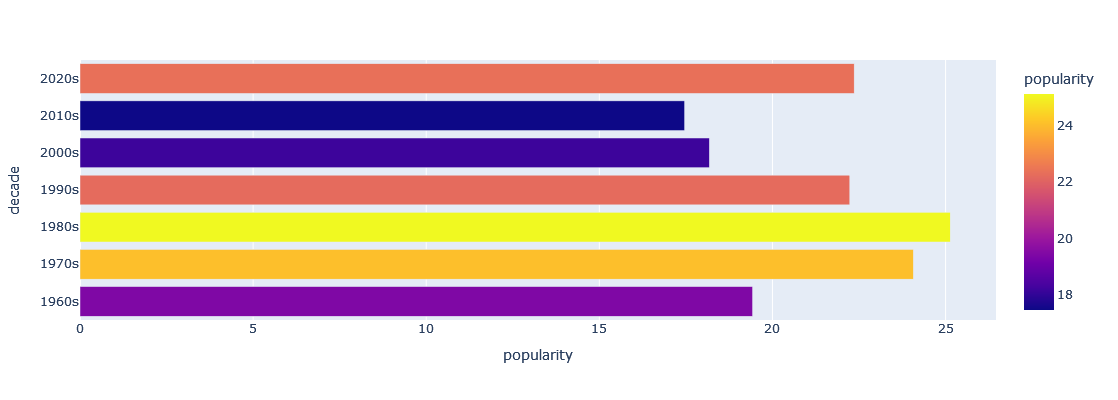

In [54]:
# Decade-wise popularity
popu_year_df = temp.groupby("decade")["popularity"].mean().reset_index()

fig = px.bar(popu_year_df, y = "decade", x = "popularity", color = "popularity",
             width = 800, height = 400)
fig.show()

## Clustering:

In [58]:
# Importing libraries
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, KMeans, Birch, DBSCAN
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.cm as cm

In [60]:
# Features to be used for clustering
features = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
            'speechiness', 'tempo', 'valence', 'popularity', 'duration_min']]

In [62]:
features['only_music'] = (features.acousticness + features.instrumentalness)
features['mode'] = (features.energy + features.valence + features.loudness)
features

acousticness  danceability  energy  instrumentalness  liveness  \
0           0.0824         0.463   0.993          0.996000    0.9320   
1           0.4370         0.326   0.965          0.233000    0.9610   
2           0.4160         0.386   0.969          0.400000    0.9560   
3           0.5670         0.369   0.985          0.000107    0.8950   
4           0.4000         0.303   0.969          0.055900    0.9660   
...            ...           ...     ...               ...       ...   
1605        0.1570         0.466   0.932          0.006170    0.3240   
1606        0.0576         0.509   0.706          0.000002    0.5160   
1607        0.3710         0.790   0.774          0.000000    0.0669   
1608        0.2170         0.700   0.546          0.000070    0.1660   
1609        0.3830         0.727   0.934          0.068500    0.0965   

      loudness  speechiness    tempo  valence  popularity  duration_min  \
0      -12.913       0.1100  118.001   0.0302          33      0.810667   
1       -4.803       0.0759  131.455   0.3180          34      4.219550   
2       -4.936       0.1150  130.066   0.3130          34      4.386000   
3       -5.535       0.1930  132.994   0.1470          32      5.098000   
4       -5.098       0.0930  130.533   0.2060          32      5.085100   
...        ...          ...      ...      ...         ...           ...   
1605    -9.214       0.0429  177.340   0.9670          39      2.568000   
1606    -9.427       0.0843  122.015   0.4460          36      4.087767   
1607    -7.961       0.0720   97.035   0.8350          30      2.934667   
1608    -9.567       0.0622  102.634   0.5320          27      2.028000   
1609    -8.373       0.0359  125.275   0.9690          35      3.153100   

      only_music     mode  
0       1.078400 -11.8898  
1       0.670000  -3.5200  
2       0.816000  -3.6540  
3       0.567107  -4.4030  
4       0.455900  -3.9230  
...          ...      ...  
1605    0.163170  -7.3150  
1606    0.057602  -8.2750  
1607    0.371000  -6.3520  
1608    0.217070  -8.4890  
1609    0.451500  -6.4700  

[1610 rows x 13 columns]

In [64]:
features['liveness'].describe()

count    1610.00000
mean        0.49173
std         0.34910
min         0.02190
25%         0.15300
50%         0.37950
75%         0.89375
max         0.99800
Name: liveness, dtype: float64

In [66]:
features['liveness'] = pd.DataFrame(pd.cut(features.liveness, bins=[0, 0.8, 1.0], labels=[0, 1]))

In [68]:
features = features[['danceability', 'liveness',  'speechiness', 'tempo', 'mode', 'popularity', 'only_music', 'duration_min']]

In [70]:
# Standardizing the features
features_standardized = pd.DataFrame(MinMaxScaler().fit_transform(features), columns = features.columns)

#  Features decomposition into 2 components using PCA
pca = PCA(n_components = 2)
features_pca = pd.DataFrame(pca.fit_transform(features_standardized))

### K-Means Clustering:

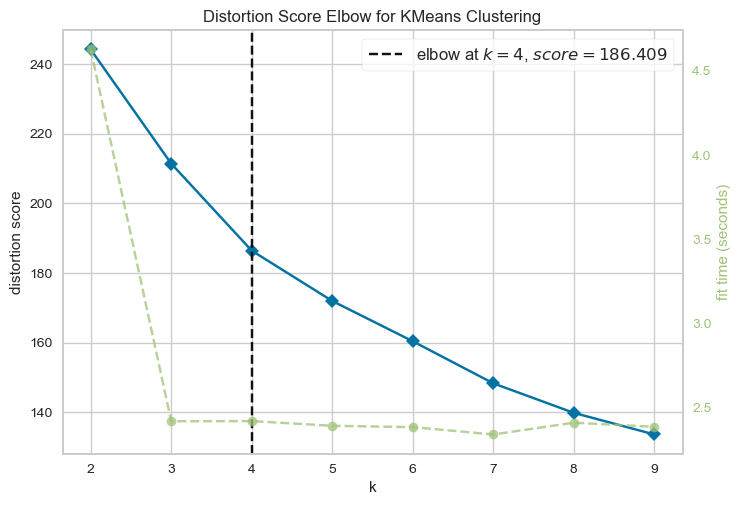

In [73]:
model = KMeans(init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
visualizer = KElbowVisualizer(model, k = (2,10))
visualizer.fit(features_standardized)
visualizer.show()
plt.show()

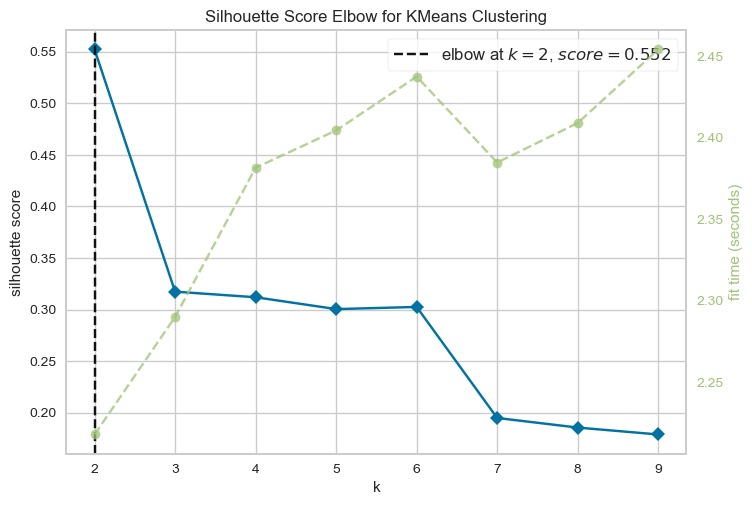

In [74]:
model = KMeans(init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
visualizer = KElbowVisualizer(model, k = (2,10), metric = "silhouette")
visualizer.fit(features_standardized)
visualizer.show()
plt.show()

In [75]:
kmeans_silhouette_scores = []
def cal_silhouette_score(data, range_n_clusters):
    for n_cluster in range_n_clusters:
        # intialise kmeans
        kmeans = KMeans(n_clusters=n_cluster, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(data)
        # silhouette score
        score = silhouette_score(data, kmeans.labels_) # metric='euclidean'
        kmeans_silhouette_scores.append(score)
        print(f"For n_clusters={n_cluster}, the silhouette score is {score}")

In [76]:
range_n_clusters = range(2,7)
cal_silhouette_score(features_standardized, range_n_clusters)

For n_clusters=2, the silhouette score is 0.552236392915142
For n_clusters=3, the silhouette score is 0.31735374421755946
For n_clusters=4, the silhouette score is 0.3119394214666782
For n_clusters=5, the silhouette score is 0.3004451899320815
For n_clusters=6, the silhouette score is 0.3025342144089848


In [77]:
k = 3
kmeans = KMeans(n_clusters = k, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(features_standardized)

labels = kmeans.predict(features_standardized)
n_clusters_ = len(set(labels))

#colors = cm.nipy_spectral(labels.astype(float)/n_clusters_)
fig_dims = (10,5)
fig, ax = plt.subplots(figsize = fig_dims)
plt.scatter(features_pca[0], features_pca[1],  cmap="Set1", c=labels)

centers = pca.fit_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);

In [78]:
k = 3
kmeans = KMeans(n_clusters = k, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(features_standardized)

labels = kmeans.predict(features_standardized)
n_clusters_ = len(set(labels))

pca = PCA(n_components = 3)
features_pca = pd.DataFrame(pca.fit_transform(features_standardized))

import plotly.graph_objs as go
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'PCA1'),yaxis = dict(title  = 'PCA2'),zaxis = dict(title  = 'PCA3'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
trace = go.Scatter3d(x=features_pca[0], y=features_pca[1], z=features_pca[2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

The Rolling Stones are widely considered to be one of the most influential and important rock and roll bands of all time. Their music encompasses a wide range of styles, including rock and roll, blues, R&B, and country, among others. While IT IS DIFFICULT TO DIVIDE THEIR SONGS IN JUST THREE GENRES, here's an attempt based on the dominant musical influences in their music:

1. Rock and Roll: The Rolling Stones are often considered one of the pioneers of rock and roll music, and many of their songs are considered classic examples of the genre. Songs like "Jumpin' Jack Flash," "Brown Sugar," and "Start Me Up" are considered quintessential Rolling Stones rock and roll tracks.

2. Blues: The Rolling Stones have always been heavily influenced by the blues, and many of their early songs were covers of classic blues tracks. Their later work also reflects this influence, with songs like "Miss You," "Tumbling Dice," and "Love in Vain" showcasing the bluesy side of the band.

3. R&B: The Rolling Stones have also been heavily influenced by R&B music, especially in their early years. Songs like "Satisfaction," "The Last Time," and "It's Only Rock and Roll (But I Like It)" are classic examples of the R&B-influenced sound of the band.

These genres are not mutually exclusive and many of the Rolling Stones' songs incorporate elements from multiple genres. However, these are the three genres that are most often associated with their music.

## Cluster Analysis:

In [85]:
k = 3
kmeans = KMeans(n_clusters = k, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(features_standardized)

labels = kmeans.predict(features_standardized)

df_new = df.copy()
df_new["cluster"] = labels
df_new.head(2)

name               album release_date  track_number  \
0  Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
1  Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.463   0.993             0.996     0.932   -12.913       0.1100   
1         0.326   0.965             0.233     0.961    -4.803       0.0759   

     tempo  valence  popularity  duration_ms  release_year  duration_min  \
0  118.001   0.0302          33        48640          2022      0.810667   
1  131.455   0.3180          34       253173          2022      4.219550   

   cluster  
0        1  
1        1

In [86]:
df_new["cluster"] = df_new["cluster"].map({0:1, 1:2, 2:3})
df_new["cluster"].value_counts(normalize = True).to_frame(name = "Percentage Distribution")

Percentage Distribution
cluster                         
3                       0.462112
2                       0.308696
1                       0.229193

In [87]:
df_new.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10             3   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10             4   
4          Donâ€™t Stop - Live  Licked Live In NYC   2022-06-10             5   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.463   0.993          0.996000     0.932   -12.913       0.1100   
1         0.326   0.965          0.233000     0.961    -4.803       0.0759   
2         0.386   0.969          0.400000     0.956    -4.936       0.1150   
3         0.369   0.985          0.000107     0.895    -5.535       0.1930   
4         0.303   0.969          0.055900     0.966    -5.098       0.0930   

     tempo  valence  popularity  duration_ms  release_year  duration_min  \
0  118.001   0.0302          33        48640          2022      0.810667   
1  131.455   0.3180          34       253173          2022      4.219550   
2  130.066   0.3130          34       263160          2022      4.386000   
3  132.994   0.1470          32       305880          2022      5.098000   
4  130.533   0.2060          32       305106          2022      5.085100   

   cluster  
0        2  
1        2  
2        2  
3        2  
4        2

### Cluster - 1 analysis:

In [89]:
cluster_1 = df_new[df_new["cluster"] == 1]
cluster_1.head(2)

name  \
45    Worried About You - Live At The El Mocambo 1977   
67  When The Whip Comes Down - Live at Wembley Sta...   

                        album release_date  track_number  \
45     Live At The El Mocambo   2022-05-13            23   
67  Tattoo You (Super Deluxe)   2021-10-22             2   

                        id                                   uri  \
45  5FMCBVnugUvShPqgxBFDpU  spotify:track:5FMCBVnugUvShPqgxBFDpU   
67  5EARznSdXjRszJk5WTSFqx  spotify:track:5EARznSdXjRszJk5WTSFqx   

    acousticness  danceability  energy  instrumentalness  liveness  loudness  \
45         0.511         0.389   0.717           0.00627     0.714    -6.576   
67         0.194         0.382   0.972           0.95900     0.670    -6.821   

    speechiness   tempo  valence  popularity  duration_ms  release_year  \
45       0.0263  82.795    0.633          25       491053          2022   
67       0.1020  79.249    0.436          19       273546          2021   

    duration_min  cluster  
45      8.184217        1  
67      4.559100        1

In [90]:
cluster_1.describe()

release_date  track_number  acousticness  \
count                            369    369.000000    369.000000   
mean   1981-05-30 23:13:10.243902464      7.823848      0.466530   
min              1964-04-16 00:00:00      1.000000      0.000158   
25%              1967-12-08 00:00:00      3.000000      0.221000   
50%              1972-05-12 00:00:00      7.000000      0.527000   
75%              1986-03-24 00:00:00     10.000000      0.674000   
max              2022-05-13 00:00:00     37.000000      0.994000   
std                              NaN      5.856423      0.256673   

       danceability      energy  instrumentalness    liveness    loudness  \
count    369.000000  369.000000        369.000000  369.000000  369.000000   
mean       0.509062    0.696938          0.406063    0.285983   -8.181802   
min        0.107000    0.141000          0.000000    0.026100  -24.408000   
25%        0.414000    0.553000          0.005580    0.114000  -10.285000   
50%        0.509000    0.740000          0.462000    0.222000   -8.146000   
75%        0.613000    0.843000          0.765000    0.398000   -5.630000   
max        0.835000    0.997000          0.978000    0.800000   -1.568000   
std        0.128164    0.193578          0.367132    0.208602    3.555025   

       speechiness       tempo     valence  popularity    duration_ms  \
count   369.000000  369.000000  369.000000  369.000000     369.000000   
mean      0.054859  115.367943    0.613567   23.243902  231185.915989   
min       0.024500   57.772000    0.000000    0.000000   21000.000000   
25%       0.032100   94.471000    0.444000   14.000000  170573.000000   
50%       0.041700  114.076000    0.618000   21.000000  215920.000000   
75%       0.057400  133.453000    0.811000   32.000000  275160.000000   
max       0.425000  187.292000    0.969000   76.000000  667918.000000   
std       0.042658   27.373034    0.237078   14.593407   90840.546481   

       release_year  duration_min  cluster  
count    369.000000    369.000000    369.0  
mean    1980.867209      3.853099      1.0  
min     1964.000000      0.350000      1.0  
25%     1967.000000      2.842883      1.0  
50%     1972.000000      3.598667      1.0  
75%     1986.000000      4.586000      1.0  
max     2022.000000     11.131967      1.0  
std       18.923508      1.514009      0.0

In [91]:
top_10_songs = cluster_1.name.value_counts()[:10]
top_10_songs.to_frame(name = "Count")

Count
name                                     
Wild Horses - 2009 Mix                  4
Ruby Tuesday                            4
Let's Spend The Night Together          4
Gotta Get Away - Mono Version           4
Hitch Hike - Remastered 2002            4
Something Happened To Me Yesterday      4
Happy                                   4
Tumbling Dice                           4
I Just Want To See His Face             3
Ventilator Blues                        3

In [92]:
cluster_1.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms', 'release_year', 'duration_min', 'cluster'],
      dtype='object')

In [93]:
df1 = cluster_1[['acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'release_year', 'duration_min']]

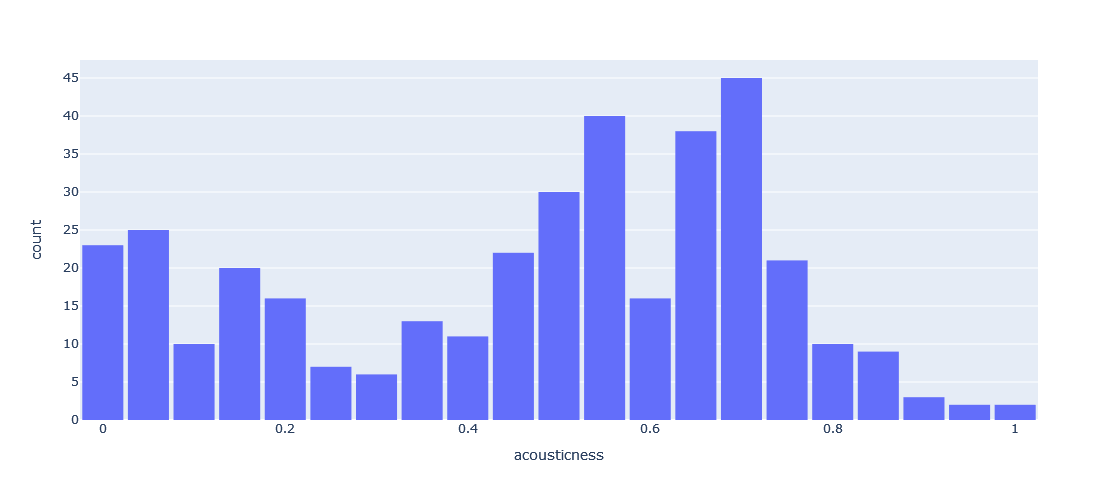

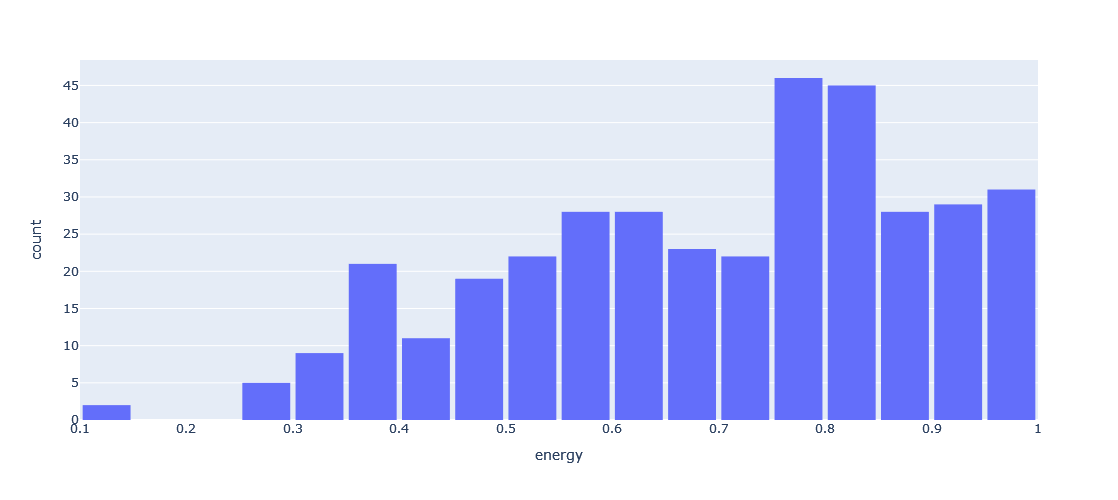

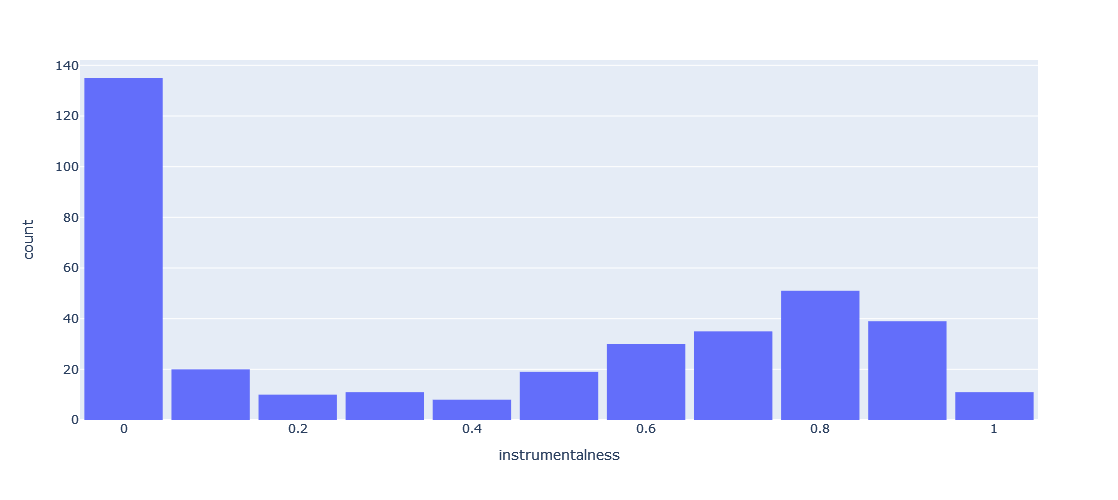

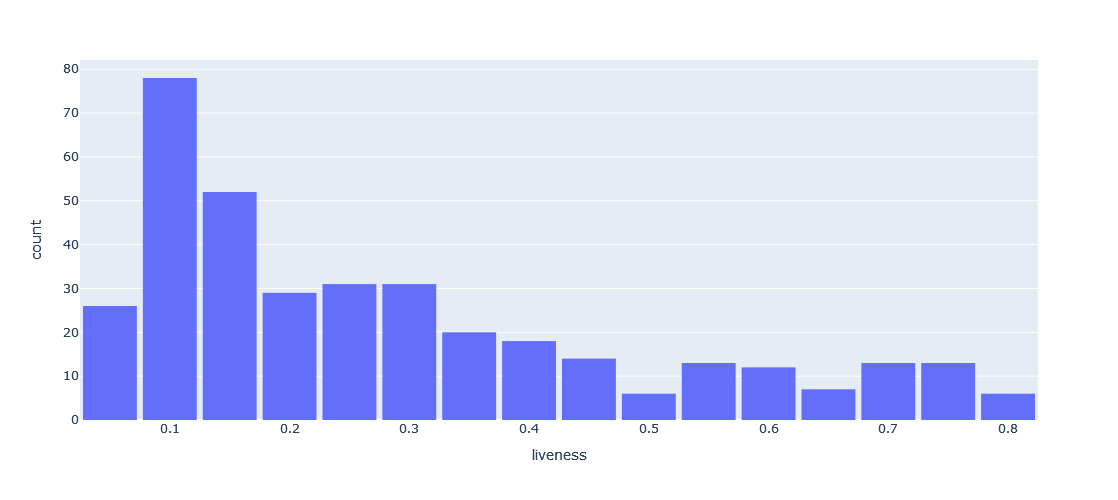

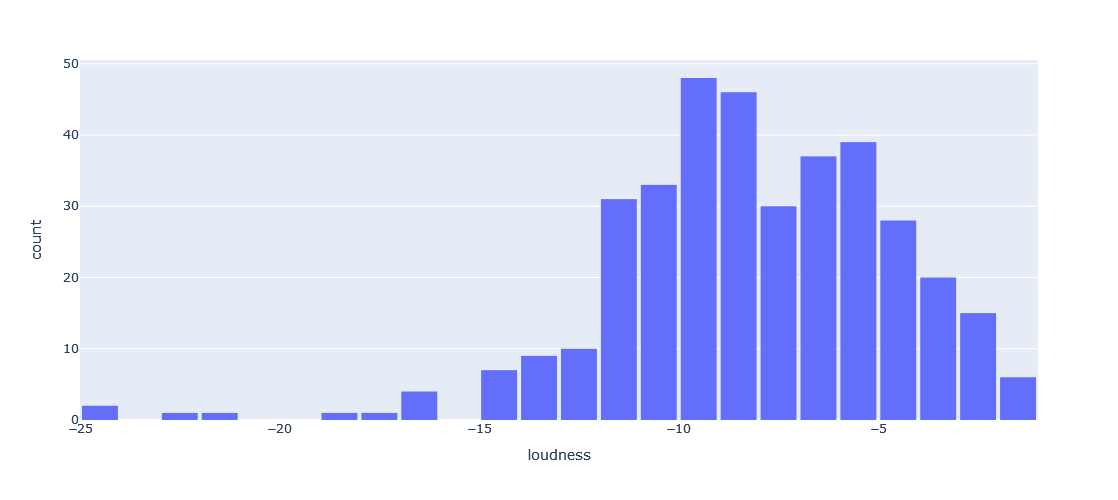

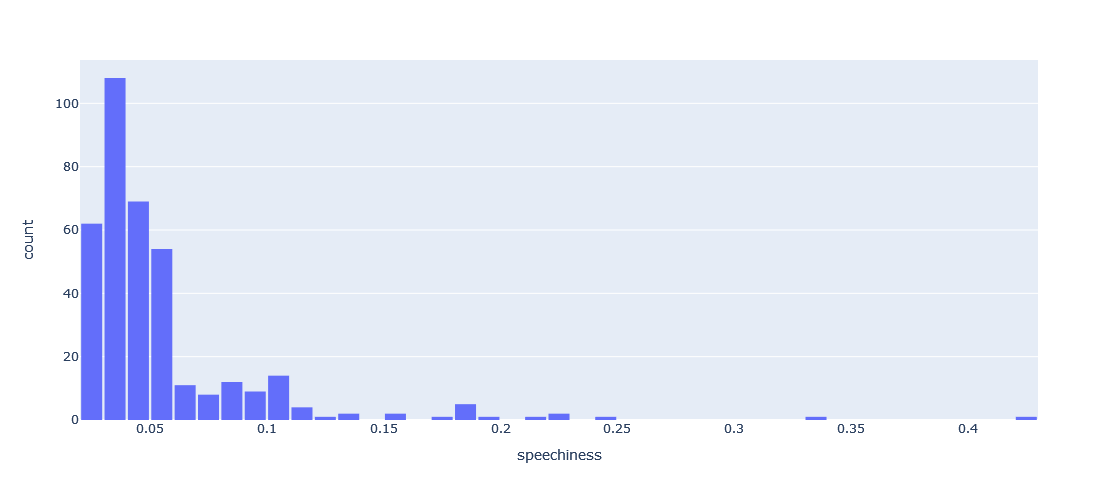

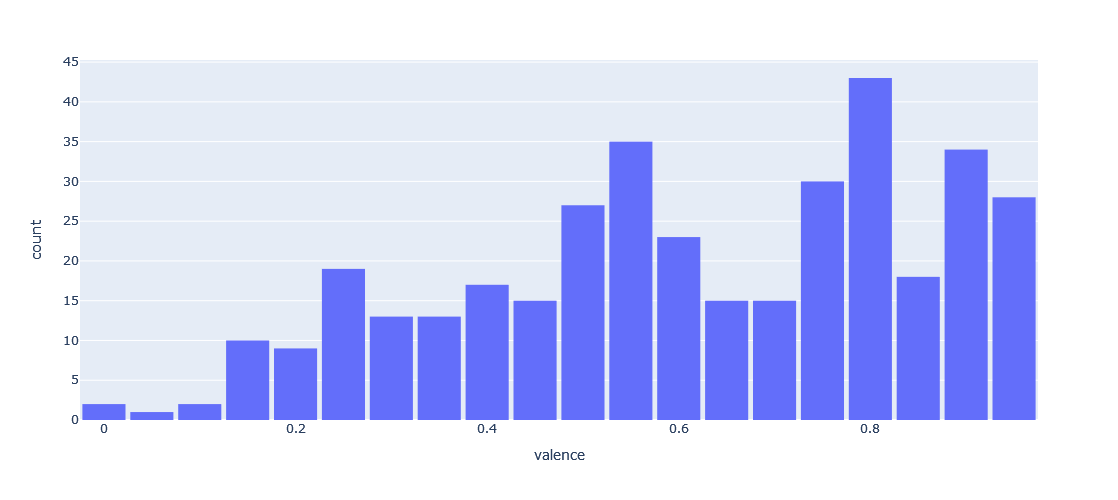

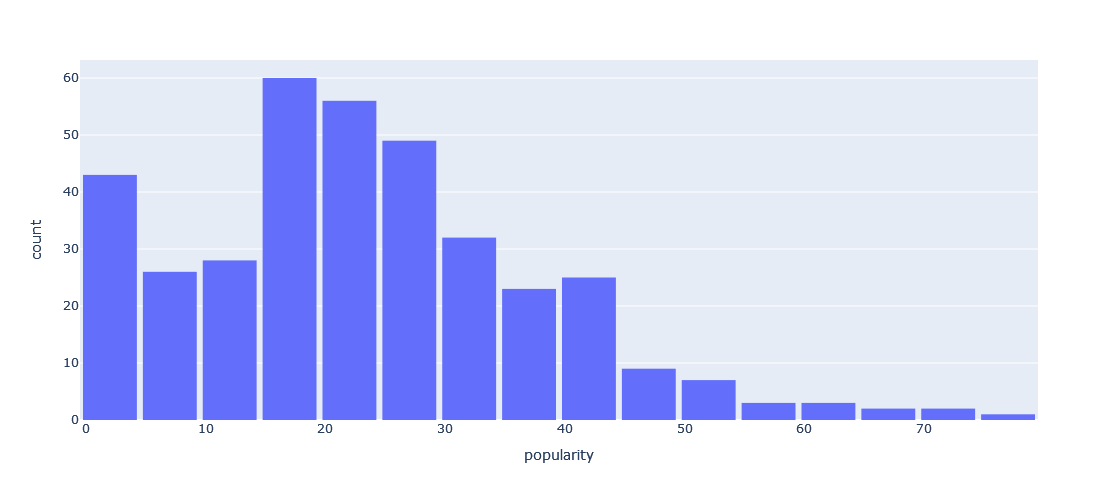

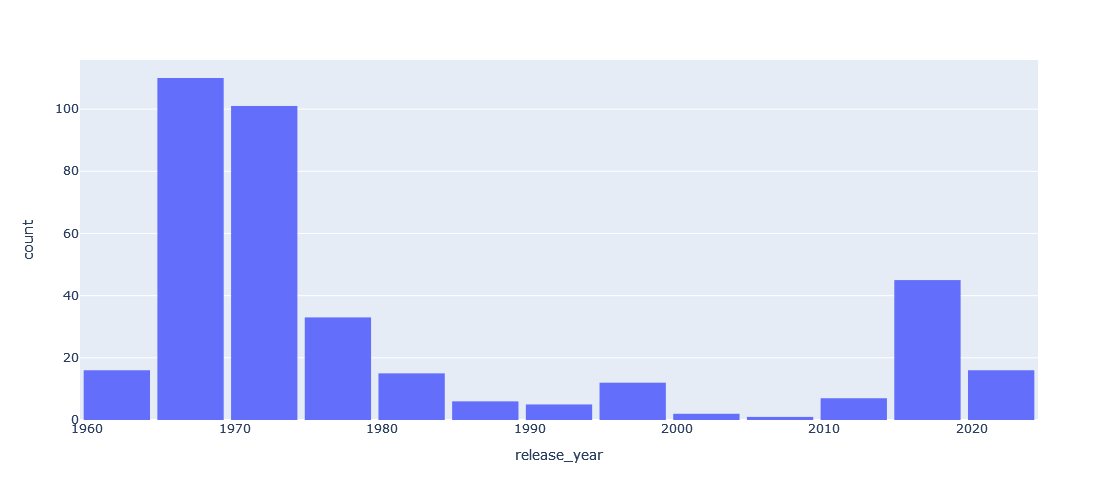

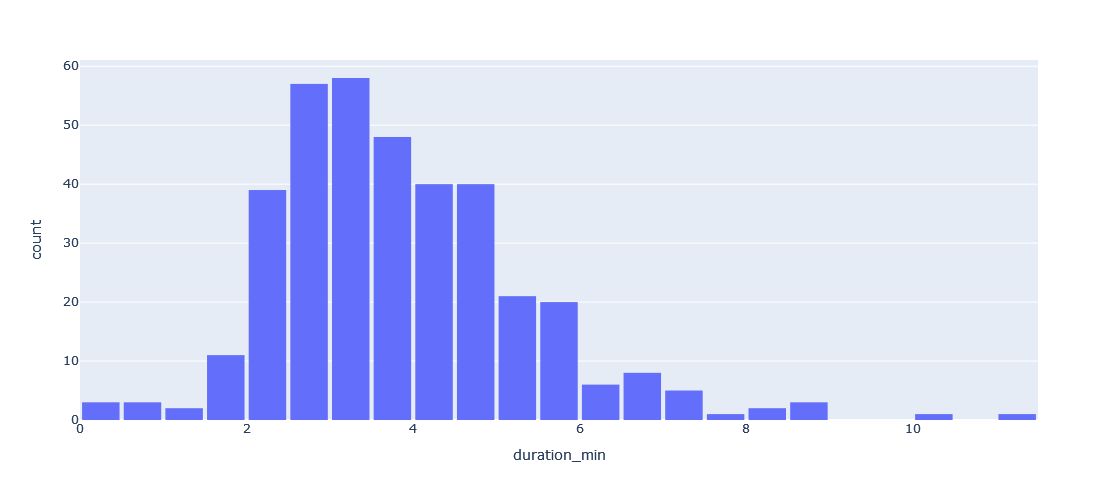

In [94]:
for i, col in enumerate(df1.columns):
  fig = px.histogram(df1, x = col)
  fig.update_layout(width = 1000, height = 500, bargap = 0.1)
  fig.show()

- least acoustic
- least danceable
- high energy
- mostly peformed live
- mostly loud
- mostly lyrical
- comparitively less positive and cheerful songs
- least popular songs
- mostly long songs
- Most songs released in 2015-2019.
- Duration of songs in between 4.5 - 5 minutes.

### Cluster - 2 analysis:

In [98]:
cluster_2 = df_new[df_new["cluster"] == 2]
cluster_2.head(2)

name               album release_date  track_number  \
0  Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
1  Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.463   0.993             0.996     0.932   -12.913       0.1100   
1         0.326   0.965             0.233     0.961    -4.803       0.0759   

     tempo  valence  popularity  duration_ms  release_year  duration_min  \
0  118.001   0.0302          33        48640          2022      0.810667   
1  131.455   0.3180          34       253173          2022      4.219550   

   cluster  
0        2  
1        2

In [101]:
cluster_2.describe()

release_date  track_number  acousticness  \
count                            497    497.000000    497.000000   
mean   2007-10-24 07:52:16.418511104     10.108652      0.215265   
min              1965-02-13 00:00:00      1.000000      0.000024   
25%              2004-11-01 00:00:00      5.000000      0.049200   
50%              2016-06-06 00:00:00      9.000000      0.154000   
75%              2019-11-08 00:00:00     14.000000      0.343000   
max              2022-06-10 00:00:00     47.000000      0.920000   
std                              NaN      7.246820      0.200076   

       danceability      energy  instrumentalness    liveness    loudness  \
count    497.000000  497.000000        497.000000  497.000000  497.000000   
mean       0.379483    0.906469          0.158187    0.936032   -5.816847   
min        0.104000    0.272000          0.000000    0.803000  -16.572000   
25%        0.302000    0.882000          0.000308    0.909000   -6.968000   
50%        0.376000    0.949000          0.013100    0.953000   -5.445000   
75%        0.446000    0.973000          0.185000    0.972000   -4.306000   
max        0.681000    0.999000          0.996000    0.998000   -1.954000   
std        0.107400    0.107104          0.265432    0.049466    2.139672   

       speechiness       tempo     valence  popularity    duration_ms  \
count   497.000000  497.000000  497.000000  497.000000     497.000000   
mean      0.099067  130.292565    0.468642   17.368209  305550.806841   
min       0.026800   46.525000    0.015900    0.000000   27293.000000   
25%       0.058900  112.632000    0.339000   12.000000  231106.000000   
50%       0.085400  132.773000    0.454000   18.000000  278333.000000   
75%       0.118000  144.547000    0.605000   22.000000  350293.000000   
max       0.624000  213.254000    0.971000   45.000000  929457.000000   
std       0.063777   26.985247    0.195895    7.625511  128463.569673   

       release_year  duration_min  cluster  
count    497.000000    497.000000    497.0  
mean    2007.189135      5.092513      2.0  
min     1965.000000      0.454883      2.0  
25%     2004.000000      3.851767      2.0  
50%     2016.000000      4.638883      2.0  
75%     2019.000000      5.838217      2.0  
max     2022.000000     15.490950      2.0  
std       17.592052      2.141059      0.0

In [103]:
top_10_songs = cluster_2.name.value_counts()[:10]
top_10_songs.to_frame(name = "Count")

Count
name                                
Sympathy For The Devil - Live     13
Brown Sugar - Live                13
Honky Tonk Women - Live           13
Start Me Up - Live                12
Tumbling Dice - Live              12
Jumpinâ€™ Jack Flash - Live       11
Miss You - Live                    9
Midnight Rambler - Live            9
Jumpin' Jack Flash - Live          7
Street Fighting Man - Live         6

In [108]:
cluster_2.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms', 'release_year', 'duration_min', 'cluster'],
      dtype='object')

In [109]:
df2 = cluster_2[['acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'release_year', 'duration_min']]

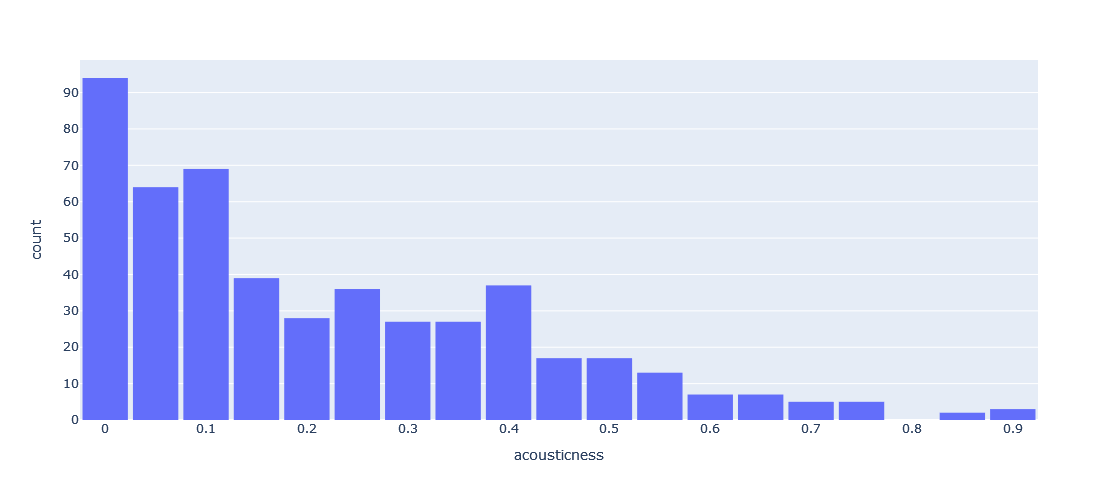

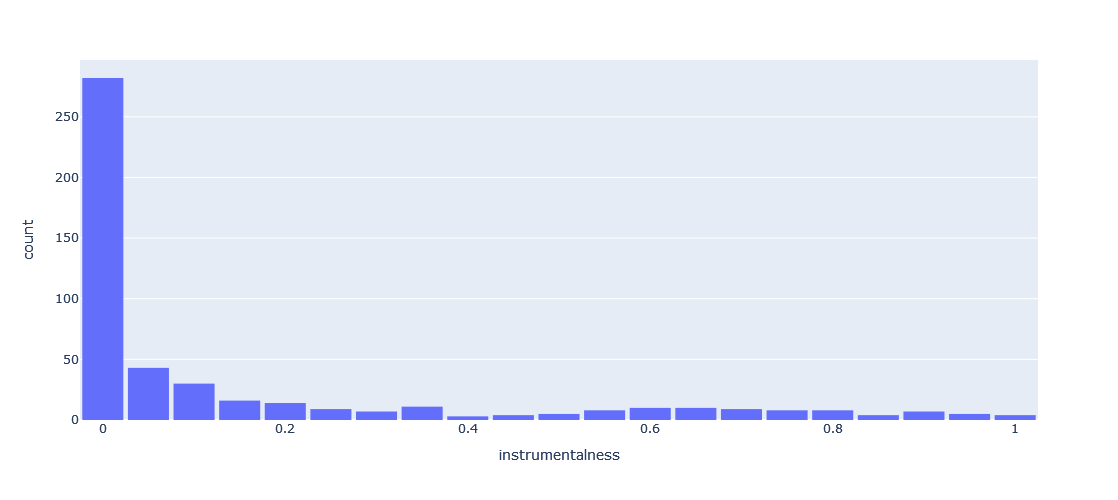

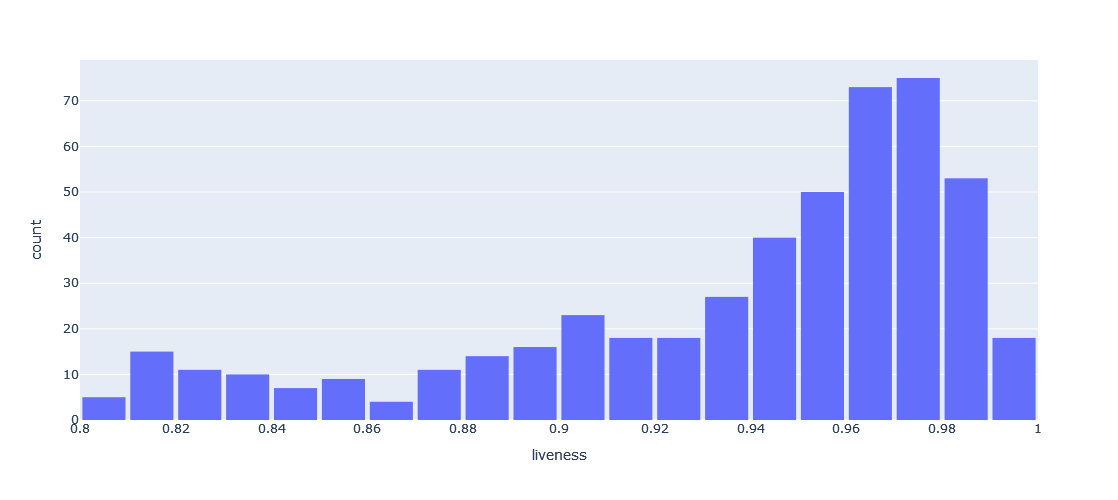

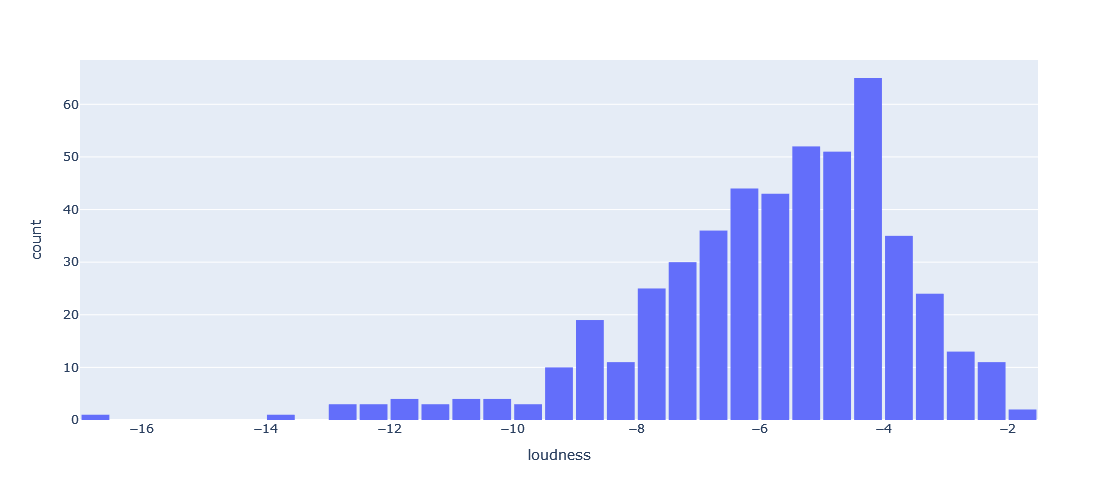

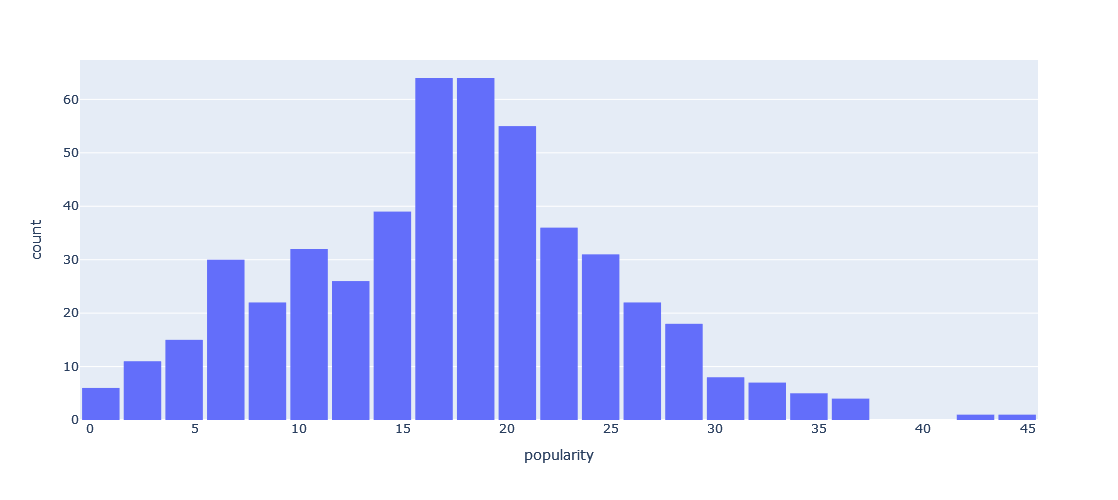

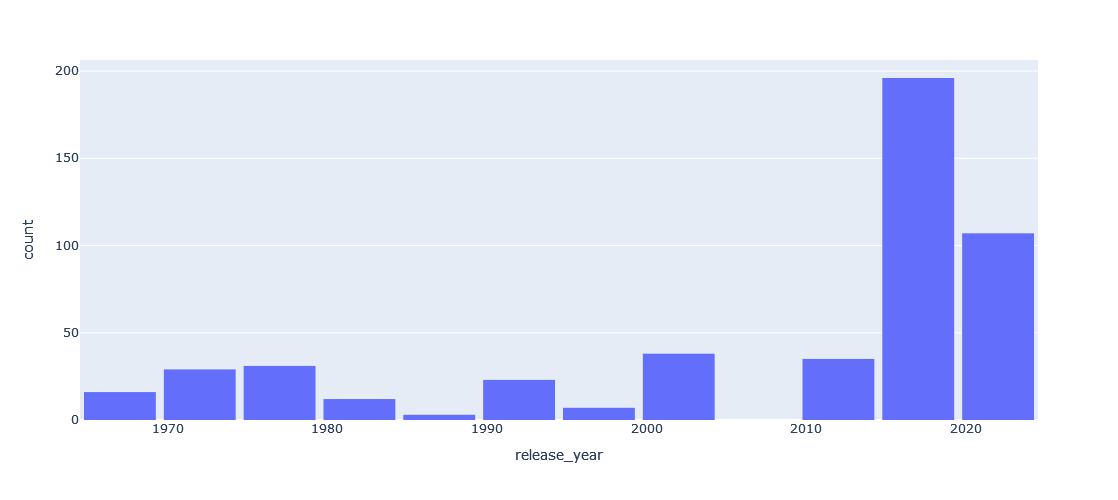

In [110]:
for i, col in enumerate(df2.columns):
  fig = px.histogram(df2, x = col)
  fig.update_layout(width = 1000, height = 500, bargap = 0.1)
  fig.show()

- mostly instrumental songs
- mostly acoustic
- Most songs released in 1970 - 1974.
- Duration of songs in between 2 - 5 minutes.

### Cluster - 3 analysis:

In [113]:
cluster_3 = df_new[df_new["cluster"] == 3]
cluster_3.head(2)

name                   album  \
5                                Monkey Man - Live      Licked Live In NYC   
23  Honky Tonk Women - Live At The El Mocambo 1977  Live At The El Mocambo   

   release_date  track_number                      id  \
5    2022-06-10             6  3ixZ1NQk5sqvBZgWeIdiqr   
23   2022-05-13             1  7BPKw4y2CX3waC8IQnQDXB   

                                     uri  acousticness  danceability  energy  \
5   spotify:track:3ixZ1NQk5sqvBZgWeIdiqr         0.275          0.34   0.956   
23  spotify:track:7BPKw4y2CX3waC8IQnQDXB         0.162          0.43   0.901   

    instrumentalness  liveness  loudness  speechiness    tempo  valence  \
5              0.125     0.741    -5.539       0.0915  101.628    0.125   
23             0.011     0.694    -6.215       0.0450  112.077    0.890   

    popularity  duration_ms  release_year  duration_min  cluster  
5           31       244293          2022       4.07155        3  
23          32       216546          2022       3.60910        3

In [114]:
cluster_3.describe()

release_date  track_number  acousticness  \
count                            744     744.00000    744.000000   
mean   1987-05-12 15:21:17.419354816       8.00672      0.166839   
min              1964-04-16 00:00:00       1.00000      0.000009   
25%              1967-01-20 00:00:00       4.00000      0.041350   
50%              1978-06-09 00:00:00       7.00000      0.130000   
75%              2012-07-09 00:00:00      10.00000      0.254000   
max              2022-06-10 00:00:00      46.00000      0.650000   
std                              NaN       6.24327      0.147001   

       danceability      energy  instrumentalness    liveness    loudness  \
count    744.000000  744.000000        744.000000  744.000000  744.000000   
mean       0.508625    0.763444          0.048195    0.296975   -7.142798   
min        0.118000    0.242000          0.000000    0.021900  -16.325000   
25%        0.401000    0.651500          0.000068    0.111000   -9.259000   
50%        0.508000    0.802500          0.005475    0.229000   -6.932500   
75%        0.612250    0.911000          0.046675    0.422000   -4.687250   
max        0.887000    0.997000          0.591000    0.798000   -1.014000   
std        0.141289    0.172592          0.094434    0.222891    2.906472   

       speechiness       tempo     valence  popularity    duration_ms  \
count   744.000000  744.000000  744.000000  744.000000     744.000000   
mean      0.057038  128.583195    0.642426   21.854839  238964.236559   
min       0.023200   69.393000    0.039300    0.000000   35920.000000   
25%       0.034500  108.702750    0.493500   14.000000  184560.000000   
50%       0.044300  124.477500    0.665000   21.000000  227133.000000   
75%       0.063800  144.096500    0.833500   29.000000  275539.500000   
max       0.286000  216.304000    0.974000   80.000000  981866.000000   
std       0.036188   30.303470    0.222724   13.347732   89883.517399   

       release_year  duration_min  cluster  
count    744.000000    744.000000    744.0  
mean    1986.825269      3.982737      3.0  
min     1964.000000      0.598667      3.0  
25%     1967.000000      3.076000      3.0  
50%     1978.000000      3.785550      3.0  
75%     2012.000000      4.592325      3.0  
max     2022.000000     16.364433      3.0  
std       21.540324      1.498059      0.0

In [115]:
top_10_songs = cluster_3.name.value_counts()[:10]
top_10_songs.to_frame(name = "Count")

Count
name                                                     
Monkey Man - Live                                       4
Take It Or Leave It                                     4
The Under Assistant West Coast Promotion Man - ...      4
Cry To Me - Remastered 2002                             4
Good Times - Remastered 2002                            4
That's How Strong My Love Is - Remastered 2002          4
Mercy Mercy - Remastered 2002                           4
Brown Sugar - 2009 Remaster                             4
I'm Free - Mono Version                                 4
Rocks Off                                               4

In [118]:
cluster_3.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms', 'release_year', 'duration_min', 'cluster'],
      dtype='object')

In [121]:
df3 = cluster_3[['acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'release_year', 'duration_min']]

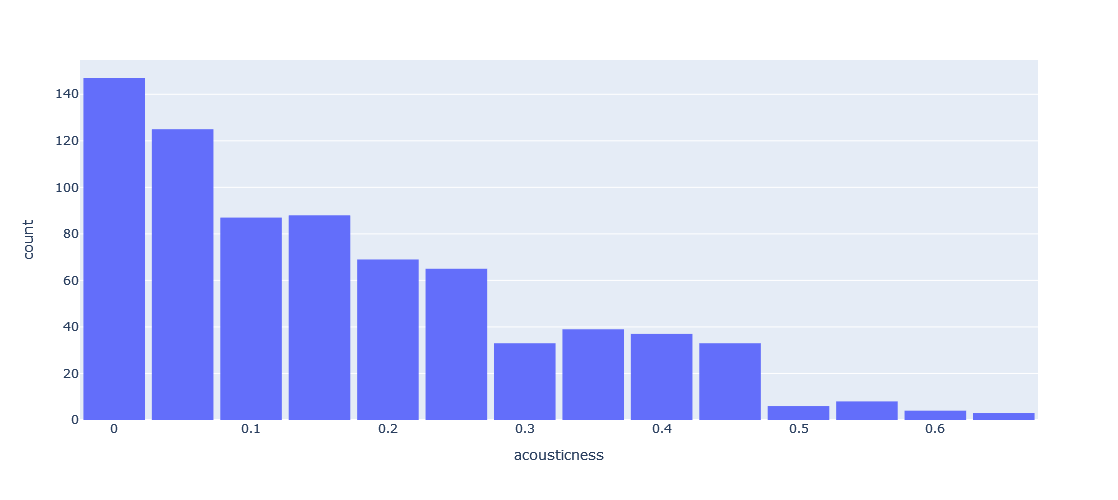

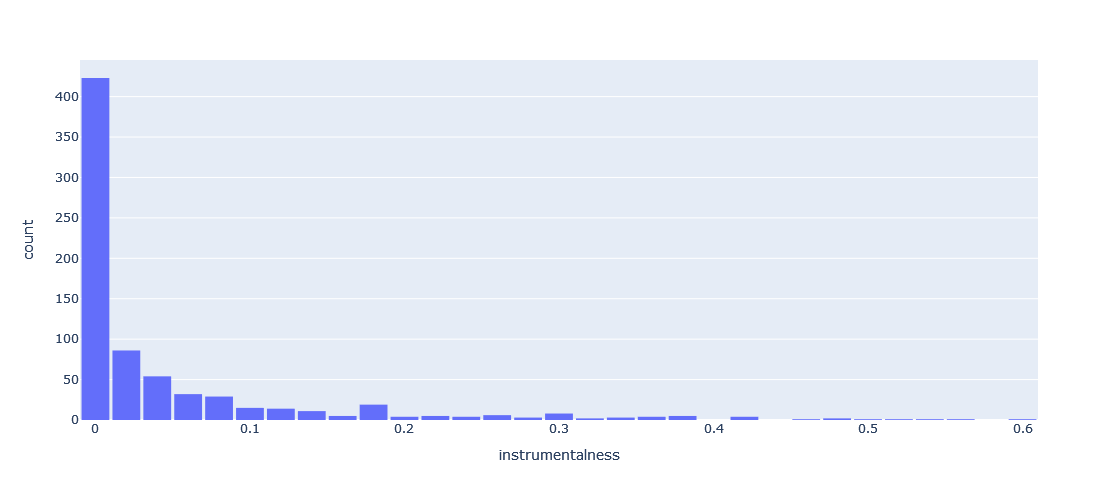

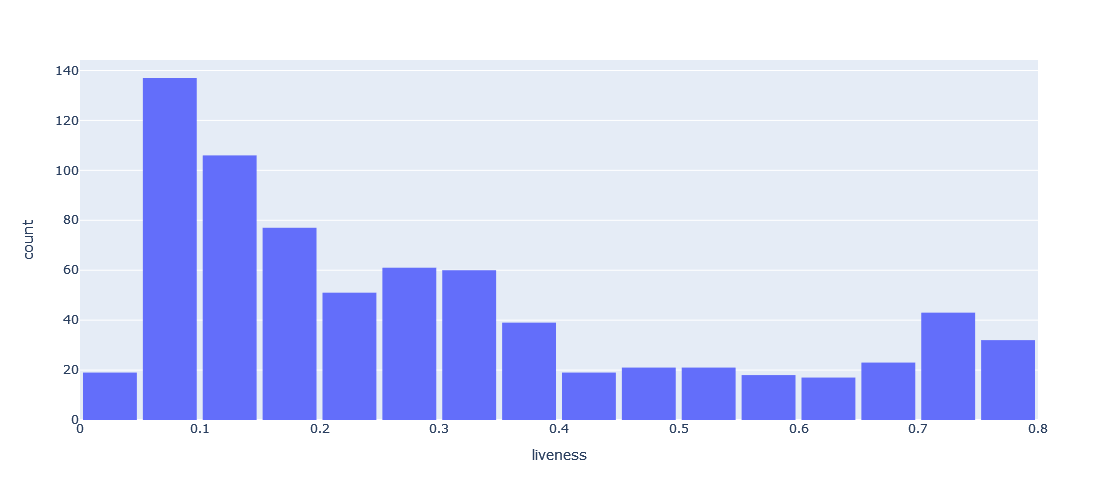

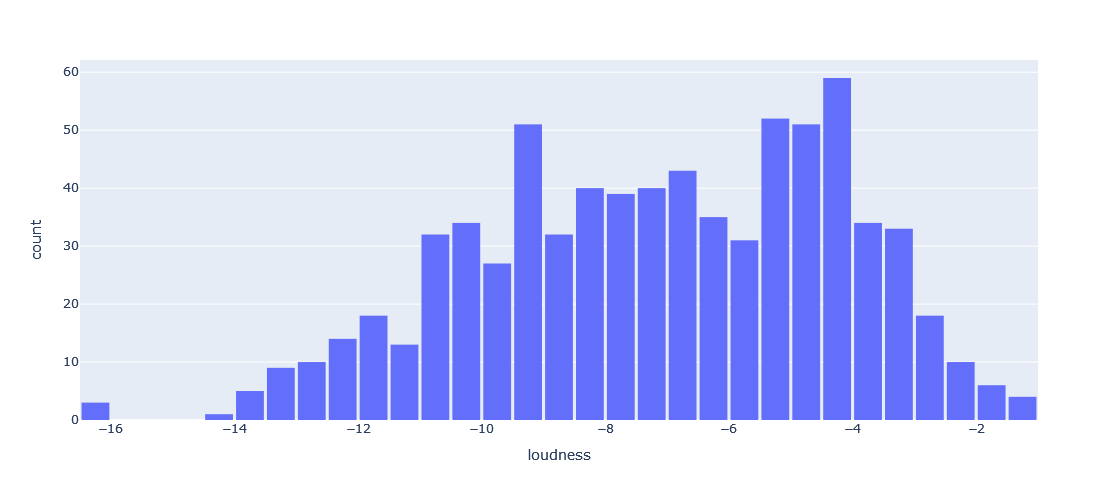

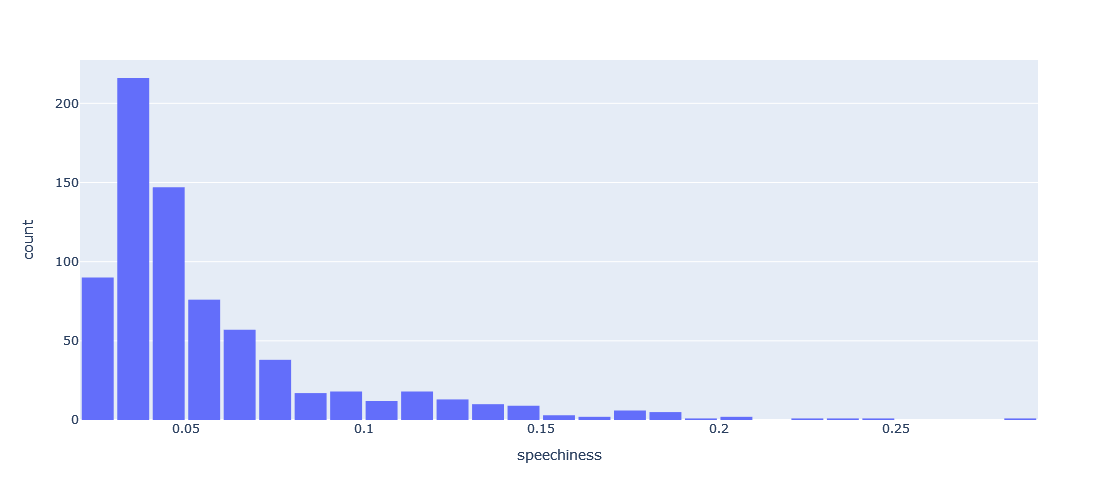

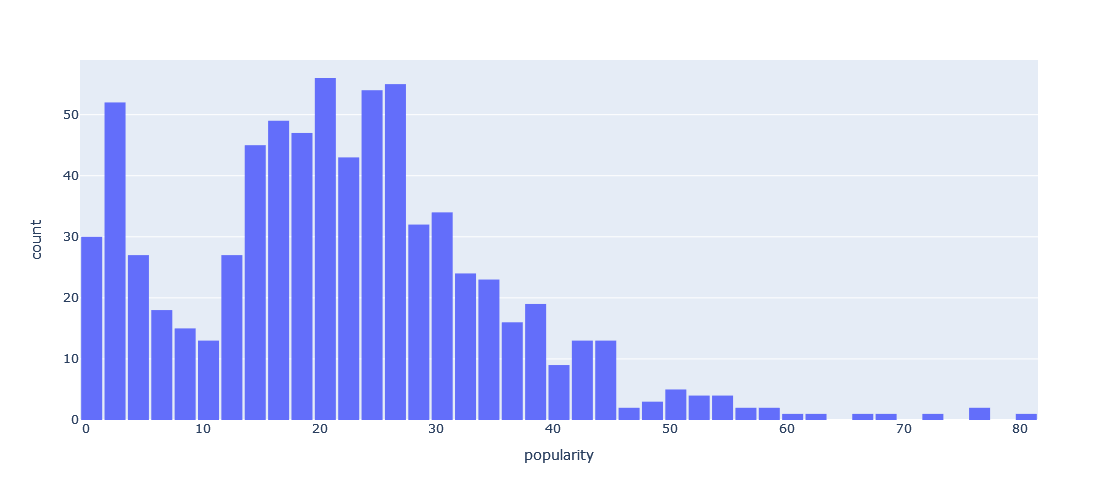

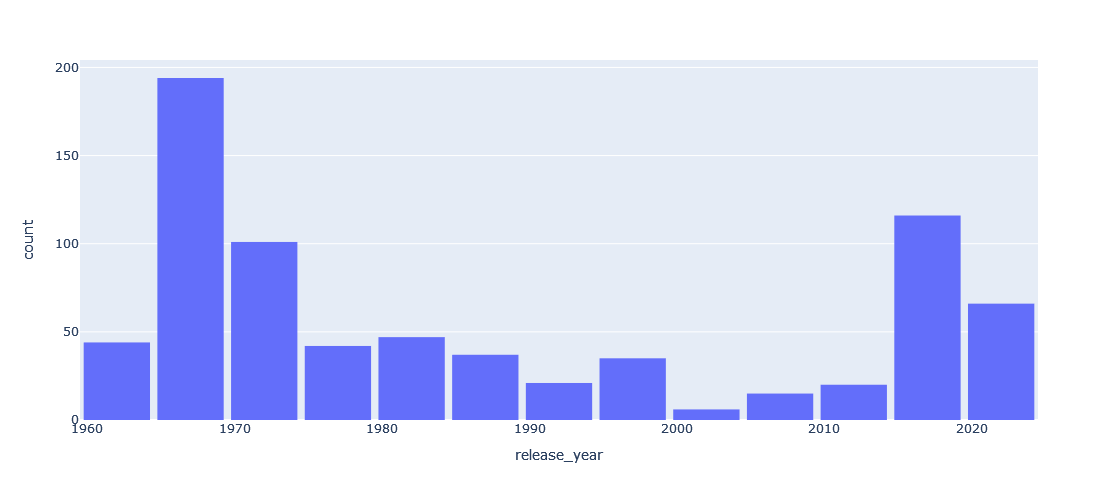

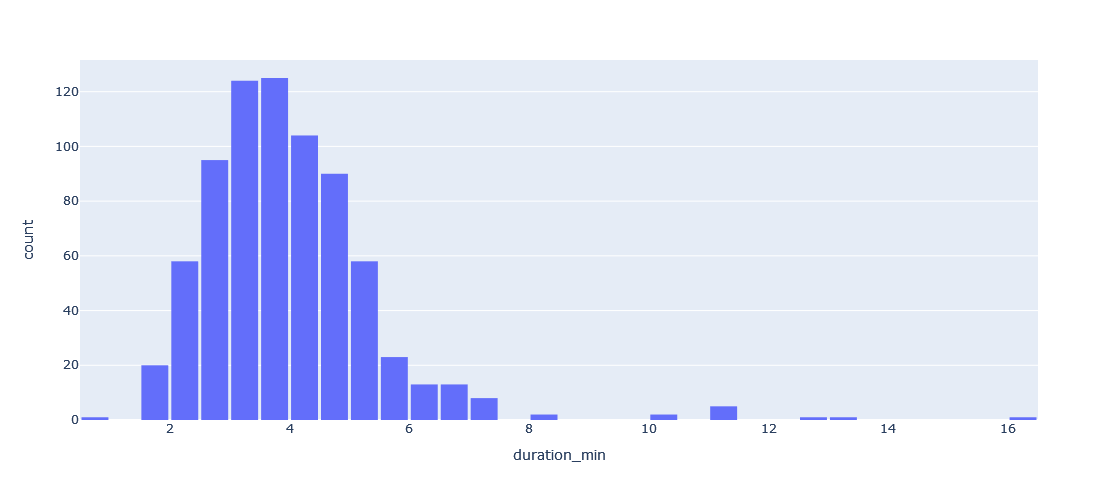

In [123]:
for i, col in enumerate(df3.columns):
  fig = px.histogram(df3, x = col)
  fig.update_layout(width = 1000, height = 500, bargap = 0.1)
  fig.show()

- least energetic
- not played live much
- Most songs released in 1965-1969.
- Duration of songs in between 3 - 3.5 minutes.

**Final Summarization:**

1 - **Long Time Followers** -  who were drawn to the band's enduring legacy and music.

2 - **Acoustic Rock Enthusiasts** - fans of thoughtful and introspective music that provides an emotional connection with the listener.

3 - **Instrumental Rock Enthusiasts** - fans of music that uplifts their spirits and provides a sense of joy and positivity.

In [127]:
df_new["cluster"] = df_new["cluster"].map({1: "Long Time Followers",
                                           2: "Acoustic Rock Enthusiasts",
                                           3: "Instrumental Rock Enthusiasts"})

df_new.head()

name               album release_date  track_number  \
0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10             1   
1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10             2   
2           Start Me Up - Live  Licked Live In NYC   2022-06-10             3   
3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10             4   
4          Donâ€™t Stop - Live  Licked Live In NYC   2022-06-10             5   

                       id                                   uri  acousticness  \
0  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824   
1  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370   
2  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160   
3  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670   
4  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.463   0.993          0.996000     0.932   -12.913       0.1100   
1         0.326   0.965          0.233000     0.961    -4.803       0.0759   
2         0.386   0.969          0.400000     0.956    -4.936       0.1150   
3         0.369   0.985          0.000107     0.895    -5.535       0.1930   
4         0.303   0.969          0.055900     0.966    -5.098       0.0930   

     tempo  valence  popularity  duration_ms  release_year  duration_min  \
0  118.001   0.0302          33        48640          2022      0.810667   
1  131.455   0.3180          34       253173          2022      4.219550   
2  130.066   0.3130          34       263160          2022      4.386000   
3  132.994   0.1470          32       305880          2022      5.098000   
4  130.533   0.2060          32       305106          2022      5.085100   

                     cluster  
0  Acoustic Rock Enthusiasts  
1  Acoustic Rock Enthusiasts  
2  Acoustic Rock Enthusiasts  
3  Acoustic Rock Enthusiasts  
4  Acoustic Rock Enthusiasts

In [128]:
# df_new.to_csv("Songs with Cohorts.csv")